<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

Мобильный оператор предлагает клиентам два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Необходимо сделать предварительный анализ тарифов на данных 500 пользователей: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Изучение данных

In [2]:
from scipy import stats as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_columns', None)

In [10]:
ROOT_PATH = 'datasets/'

In [11]:
calls = pd.read_csv(ROOT_PATH + 'calls.csv')
display(calls.head())
display(calls.describe())
calls.info()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [12]:
internet = pd.read_csv(ROOT_PATH + 'internet.csv')
display(internet.head())
display(internet.describe())
display(internet.info())

messages = pd.read_csv(ROOT_PATH + 'messages.csv')
display(messages.head())
display(messages.describe())
display(messages.info())

tariffs = pd.read_csv(ROOT_PATH + 'tariffs.csv')
display(tariffs.head())

users = pd.read_csv(ROOT_PATH + 'users.csv')
display(users.head())
display(users.describe())
display(users.info())

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

In [13]:
# проверяем полные дупликаты
print(calls.duplicated().sum(),
    messages.duplicated().sum(),
    internet.duplicated().sum(),
    users.duplicated().sum())

0 0 0 0


 ### Вывод
 Изучили данные. Выбросов пропущенных значений или дубликатов не обнаружено. Столбцы <b>Unnamed: 0</b> и <b>id </b>  из таблицы internet, а также <b>id </b>  из таблицы messages стоит удалить, так как они не несут новой информации.

## Подготовка данных

In [14]:
#удаление ненужных колонок
internet.drop(columns=['Unnamed: 0', 'id'], inplace=True)
messages.drop(columns='id', inplace=True)

In [15]:
calls['call_date'] = pd.to_datetime(calls['call_date'])
calls['duration'] = np.ceil(calls['duration'])
calls['duration'] = calls['duration'].astype('int')
calls['month'] = calls['call_date'].dt.month

#рассчитываем нужные столбцы, такие как месяц получения сообщения, интернет сессии, совершения звонка
calls['call_date'] = pd.to_datetime(calls['call_date'])
calls['duration'] = np.ceil(calls['duration'])
calls['duration'] = calls['duration'].astype('int')
calls['month'] = calls['call_date'].dt.month

internet['session_date'] = pd.to_datetime(internet['session_date'])
internet['month'] = internet['session_date'].dt.month

messages['message_date']= pd.to_datetime(messages['message_date'])
messages['month'] = messages['message_date'].dt.month

users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'])

tariffs = tariffs.rename(columns={'tariff_name':'tariff'}) #для дальнейшего удобства

In [177]:
#создаем суммарный датасет со статистикой по каждому юзеру и месяцу
stat = calls.groupby(['user_id','month'])[['duration']].agg([sum]).reset_index()
stat.columns = ['user_id','month', 'calls_duration']

a = messages.groupby(['user_id','month'])[['message_date']].agg(['count']).reset_index()
a.columns = ['user_id','month', 'messages_count']
stat = pd.merge(stat, a, on=['user_id', 'month'], how='outer')

a = internet.groupby(['user_id','month'])[['mb_used']].agg([sum]).reset_index()
a.columns = ['user_id', 'month', 'internet_used']
a['internet_used'] = np.ceil(a['internet_used'] / 1024).astype('int')
stat = pd.merge(stat, a, on=['user_id', 'month'], how='outer')

b = pd.merge(users[['user_id','city', 'tariff']], tariffs, on='tariff')
stat = pd.merge(b, stat, on=['user_id'], how='outer')

stat.head()

,user_id,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,month,calls_duration,messages_count,internet_used
0,1000,Краснодар,ultra,1000,30720,3000,1950,150,1,1,5.0,159.0,22.0,3.0
1,1000,Краснодар,ultra,1000,30720,3000,1950,150,1,1,6.0,172.0,60.0,23.0
2,1000,Краснодар,ultra,1000,30720,3000,1950,150,1,1,7.0,340.0,75.0,14.0
3,1000,Краснодар,ultra,1000,30720,3000,1950,150,1,1,8.0,408.0,81.0,14.0
4,1000,Краснодар,ultra,1000,30720,3000,1950,150,1,1,9.0,466.0,57.0,15.0


In [167]:
def revenue(row):
    """
    Функция расчёта выручки. 
    Получает из строки объём потраченных ресурсов 
    и расчитывает итоговую сумму, уплачиваемую абонентом
    """    
    # выручка минимально равна абонентской плате
    revenue = row['rub_monthly_fee']
    # плата за звонки сверх пакета минут
    calls = (row['calls_duration'] - row['minutes_included']) * row['rub_per_minute']
    # плата за сообщения сверх пакета сообщений
    messages = (row['messages_count'] - row['messages_included']) * row['rub_per_message']
    # количество интернет-трафика сверх пакета в гигабайтах
    internet = row['internet_used'] - row['mb_per_month_included'] / 1024
    # плата за превышение количества интернет-трафика сверх пакета
    internet *= row['rub_per_gb']

    # если есть превышение лимитов тарифных пакетов, 
    # то плата за превышение суммируется с абонентской платой    
    for i in [calls, messages, internet]:
        if i > 0:
            revenue += i

    return revenue

stat['revenue'] = stat.apply(revenue, axis=1)
stat.head()

,user_id,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,month,calls_duration,messages_count,internet_used,revenue
0,1000,Краснодар,ultra,1000,30720,3000,1950,150,1,1,5.0,159.0,22.0,3.0,1950.0
1,1000,Краснодар,ultra,1000,30720,3000,1950,150,1,1,6.0,172.0,60.0,23.0,1950.0
2,1000,Краснодар,ultra,1000,30720,3000,1950,150,1,1,7.0,340.0,75.0,14.0,1950.0
3,1000,Краснодар,ultra,1000,30720,3000,1950,150,1,1,8.0,408.0,81.0,14.0,1950.0
4,1000,Краснодар,ultra,1000,30720,3000,1950,150,1,1,9.0,466.0,57.0,15.0,1950.0


### Вывод
Подготовили данные. Временные отметки теперь в типе datetime, продолжительность каждого разговора и месячный интернет-траффик для каждого пользователя  округлили согласно правилам оператора.

В таблицe stat собраны данные для каждого клиента о кол-ве потраченных минут, SMS, и Гб за каждый месяц, а также суммарная выручка с этого клиента за каждый месяц.

## Анализ

Посчитайте для каждого пользователя:
количество сделанных звонков и израсходованных минут разговора по месяцам;
количество отправленных сообщений по месяцам;
объем израсходованного интернет-трафика по месяцам;
помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? 
Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

calls_duration                               
                count        mean median         std
tariff                                              
smart            2223  419.062978  423.0  189.325618
ultra             951  545.451104  528.0  306.925754

[]

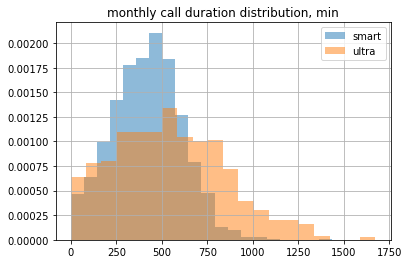

In [158]:
display(stat.groupby(by='tariff')[['calls_duration']].agg(['count', 'mean', 'median', 'std']))

stat.query('tariff == "smart"')['calls_duration'].hist(bins=20, label='smart',alpha=0.5, density=True)
stat.query('tariff == "ultra"')['calls_duration'].hist(bins=20,label='ultra',alpha=0.5, density=True)
plt.legend()
plt.title('monthly call duration distribution, min')
plt.plot()

messages_count                             
                count       mean median        std
tariff                                            
smart            1922  38.716441   34.0  26.787949
ultra             795  61.161006   51.0  45.931026

[]

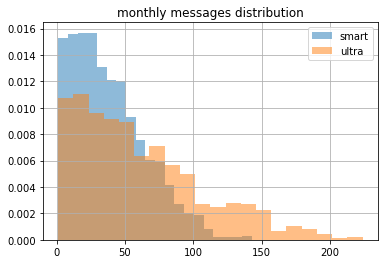

In [159]:
display(stat.groupby(by='tariff')[['messages_count']].agg(['count', 'mean', 'median', 'std']))

stat.query('tariff == "smart"')['messages_count'].hist(bins=20, label='smart',alpha=0.5, density=True)
stat.query('tariff == "ultra"')['messages_count'].hist(bins=20,label='ultra',alpha=0.5, density=True)
plt.legend()
plt.title('monthly messages distribution')
plt.plot()

internet_used                            
               count       mean median       std
tariff                                          
smart           2228  16.336176   17.0  5.737923
ultra            975  19.694359   19.0  9.702924

[]

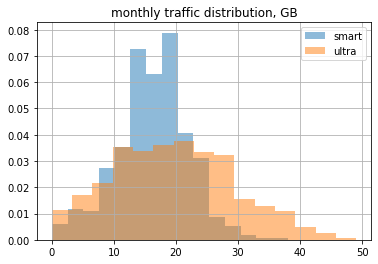

In [160]:
display(stat.groupby(by='tariff')[['internet_used']].agg(['count', 'mean', 'median', 'std']))

stat.query('tariff == "smart"')['internet_used'].hist(bins=15, label='smart',alpha=0.5, density=True)
stat.query('tariff == "ultra"')['internet_used'].hist(bins=15,label='ultra',alpha=0.5, density=True)
plt.legend()
plt.title('monthly traffic distribution, GB')
plt.plot()

### Вывод
Распределения продолжительности звонков и интернет-трафика напоминают нормальные.
Для всех трех параметров можно сказать, что в случае ultra-клиентов распределение более размазано (стандартное отклонение выше): средний расход, а также максимальное значение потраченных минут, сообщений и гигабайтов больше. 

В среднем все пользователи укладываются в выделяемое количество минут и сообщений. Однако пользователи smart близки к лимиту (среднее 418 мин близко к месячному лимиту 500 мин), в то время как пользователи ultra тратя только 500 мин из 3000. Количество сообщений составляет 38 и 61 для пользователей smart и ultra, соответственно. Обе группы укладываются в лимиты.

Пользователи smart незначительно превышают лимит в 15 ГБ (среднее количество истраченных ГБ составляет 16 ГБ), есть смысл поднять расценки за дополнительные ГБ на этом тарифе, в то время как пользователи ultra могут потратить еще 11 ГБ трафика.

## Проверка гипотез

Проверьте гипотезы средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются; средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов. Пороговое значение alpha задайте самостоятельно. Поясните: как вы формулировали нулевую и альтернативную гипотезы; какой критерий использовали для проверки гипотез и почему.

revenue                                 
         count         mean  median         std
tariff                                         
smart     2230  1289.641704  1021.0  818.370799
ultra      986  2070.030426  1950.0  376.015578

[]

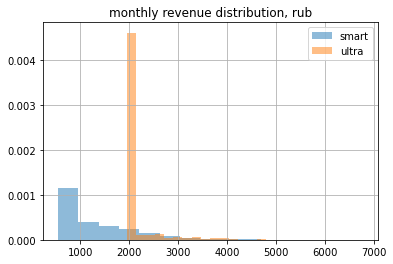

In [171]:
display(stat.groupby(by='tariff')[['revenue']].agg(['count', 'mean', 'median', 'std']))

stat.query('tariff == "smart"')['revenue'].hist(bins=15, label='smart',alpha=0.5, density=True)
stat.query('tariff == "ultra"')['revenue'].hist(bins=15,label='ultra',alpha=0.5, density=True)
plt.legend()
plt.title('monthly revenue distribution, rub')
plt.plot()

In [173]:
alpha = .01 # критический уровень статистической значимости

results = st.ttest_ind(stat.query('tariff == "smart"')['revenue'], stat.query('tariff == "ultra"')['revenue'])
results.statistic, results.pvalue

print('p-значение:', results.pvalue) 
if  results.pvalue < alpha:# сравниваем получившееся p-значение с заданным уровнем статистической значимости
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 8.081909555489933e-161
Отвергаем нулевую гипотезу


<b>Проверка гипотезы</b>: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются 

Н0: средние равны выручки по пользователям разных тарифов равны

Н1: средние не равны

<b>Вывод</b>: проверяли гипотезу о равенстве средних двух выборок (генеральных совокупностей). Нулевая гипотеза отвергается

Moscow profit
 count      611.000000
mean      1546.713584
median    1750.000000
std        752.088071
Name: revenue, dtype: float64 

not Moscow profit
 count     2605.000000
mean      1524.725144
median    1583.000000
std        808.745680
Name: revenue, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


[]

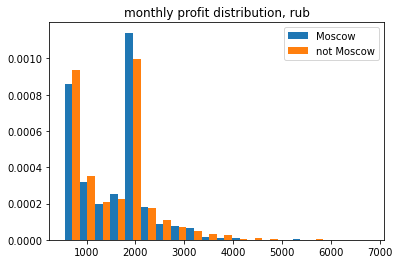

In [175]:
moscow_profit = stat.query('city == "Москва"')['revenue']
nonmoscow_profit = stat.query('city != "Москва"')['revenue']

print('Moscow profit\n', moscow_profit.agg(['count', 'mean', 'median', 'std']), '\n')
print('not Moscow profit\n', nonmoscow_profit.agg(['count', 'mean', 'median', 'std']))

plt.hist(x = [moscow_profit, nonmoscow_profit], bins=20, label=['Moscow','not Moscow'], density=True, rwidth=1)
plt.legend()
plt.title('monthly profit distribution, rub')
plt.plot()

In [176]:
results = st.ttest_ind(moscow_profit, nonmoscow_profit)
results.statistic, results.pvalue

print('p-значение:', results.pvalue) 
if  results.pvalue < alpha:# сравниваем получившееся p-значение с заданным уровнем статистической значимости
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5400751614511182
Не получилось отвергнуть нулевую гипотезу


<b>Проверка гипотезы</b>: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются 

Н0: средние значения выручки по пользователям из разных областей равны

Н1: средние не равны

<b>Вывод</b>: проверяли гипотезу о равенстве средних двух генеральных совокупностей. 
Нулевую гипотезy отвергнуть нельзя. Средние для Москвы и не Москвы могут быть равны.

## Выводы

Был проанализирован предложенный датасет с информацией от оператора сотовой связи. Проведена предобработка данных: заменен тип данных для некоторых столбцов. Выбросы или пропущенные значения выявлены не были.

Проведены дополнительные расчет минут разговора, количества сообщений и объём интернет-трафика, которые требуются пользователям каждого тарифа в месяц и рассчитаны среднее количество, дисперсия и стандартное отклонение.
- Распределения продолжительности звонков и интернет-трафика напоминают нормальные. Для всех трех параметров можно сказать, что в случае ultra-клиентов распределение более размазано (стандартное отклонение выше): средний расход минут, сообщений и гигабайтов больше.
- В среднем все пользователи укладываются в выделяемое количество минут и сообщений. Однако пользователи smart близки к лимиту (среднее 418 мин близко к месячному лимиту 500 мин), в то время как пользователи ultra тратя только 500 мин из 3000. Количество сообщений у обеих групп очень мало (в среднем 3 и 4 сообщения в месяц для пользователей smart и ultra).
- Пользователи smart незначительно превышают лимит в 15 ГБ, есть смысл поднять расценки за дополнительные ГБ на этом тарифе, в то время как пользователи ultra могут потратить еще 11 ГБ трафика.

Проверены гипотезы для уровня значимости 0.01:
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются. Нулевая гипотеза (средние значения выручки по пользователям разных тарифов равны) отвергается.
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов. Нулевую гипотезу (средние значения выручки по пользователям из разных облластей равны) отвергнуть нельзя. Средние для Москвы и остальных городов могут быть равны.

<b>Советы</b> бизнес-заказчику для увеличения выручки:
- уменьшить кол-во минут на тарифе смарт до 400, а кол-во сообщений до 30
- увеличичить плату за перерасход гб для пользователей смарт
- провести рекламную кампанию по переходу на тариф Ультра, т.к. эти пользователи приносят больше выручки